# Linear regression using Scikit learn

In [41]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
from tools import *

### Training set

In [42]:
x_train,y_train = load_data("./data/houses.txt")
x_features = ['size(sqft)','bedrooms','floors','age']

### Normalization

In [54]:
scaler = StandardScaler()
scaler.fit(x_train)
x_mean = scaler.mean_
x_stdev = np.sqrt(scaler.var_)
print(F"x_stdev = {x_stdev}\n x_mean = {x_mean}")
x_norm = scaler.transform(x_train)
print(f"Peak to Peak range by colum in x_train PTP : {np.ptp(x_train,axis=0)}")
print(f"Peak to Peak range by colum in x_norm PTP : {np.ptp(x_norm,axis=0)}")      

x_stdev = [411.61562893   0.65196523   0.48631932  25.77788069]
 x_mean = [1.41837374e+03 2.71717172e+00 1.38383838e+00 3.83838384e+01]
Peak to Peak range by colum in x_train PTP : [2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by colum in x_norm PTP : [5.8452591  6.13529646 2.05626214 3.68533012]


### Runing Gradient descent

In [55]:
reg = SGDRegressor(max_iter=1000)
reg.fit(x_norm,y_train)
w = reg.coef_
b = reg.intercept_
print(f"w : {w}")
print(f"b : {b}")

w : [109.74445462 -20.92584014 -32.29426486 -38.08753482]
b : [363.11350522]


### Target vs predictions


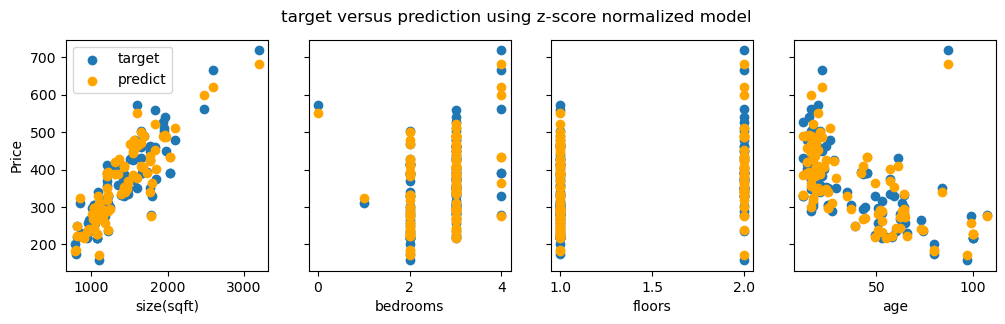

In [56]:
yp = reg.predict(x_norm)

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(x_features[i])
    ax[i].scatter(x_train[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()
